# Image Processing

Filters that perform derivatives on the value of the image are used for edge detection: the derivative (~change in value) of the pixels on a border or edge tend to be higher, since the pixels around them are more different.  

But first let's import our general packages and the data.

In [1]:
%matplotlib inline

# General imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Import our tools
import sys
sys.path.append('/Users/will/Github/facial-keypoint-detection/scripts')

# Import submit module from our tools subfolder
from tools import getdata

In [2]:
# Load data (no dev)
_loaded = getdata.load_data(0, test=False, nonas=False)

FEATURES = _loaded['features']
print 'Number of features:', len(FEATURES)

train_data = _loaded['training']['data']
train_labels = _loaded['training']['labels']
print 'Training dataset size: ', train_data.shape

Number of features: 30
Training dataset size:  (7049,)


## Plotting transforms
Quick function for plotting the image and its transform

In [3]:
def plot_transform(faces, transform):
    ''' Plots the original and transformed image of the specified faces '''
    fig, axes = plt.subplots(2,len(faces), figsize=(18,6))
    
    for i, f in enumerate(faces):

        # Plot original
        _img = train_data[f].reshape(96,96)
        axes[0, i].imshow(_img, cmap=plt.cm.gray)
        axes[0, i].axis('off')
        
        # Plot transformed
        _tr = transform(_img)        
        axes[1, i].imshow(_tr, cmap=plt.cm.gray)
        axes[1, i].axis('off')


## Sobel Filter  

A Sobel filter (or [Sobel-Feldman operator](https://en.wikipedia.org/wiki/Sobel_operator)) is an approximation to the images gradient (and therefore called, discrete differentiation operator). Let's take a look at an example

In [16]:
from skimage.filters import sobel, laplace

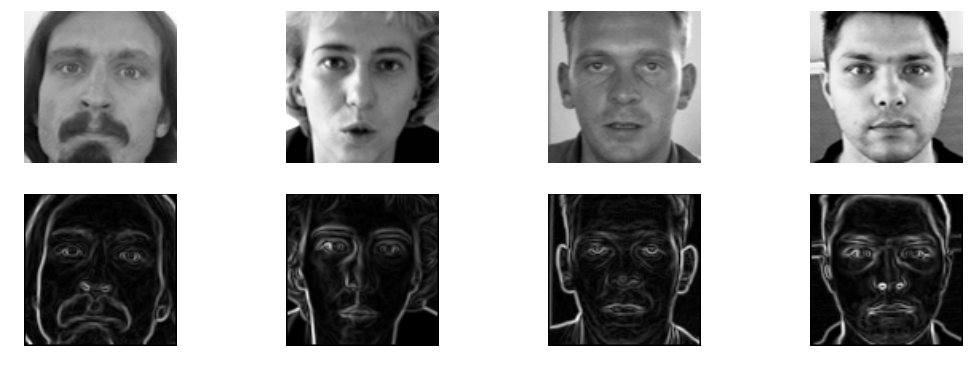

In [15]:
plot_transform([0,1,2,3], sobel)

## Laplace Transform

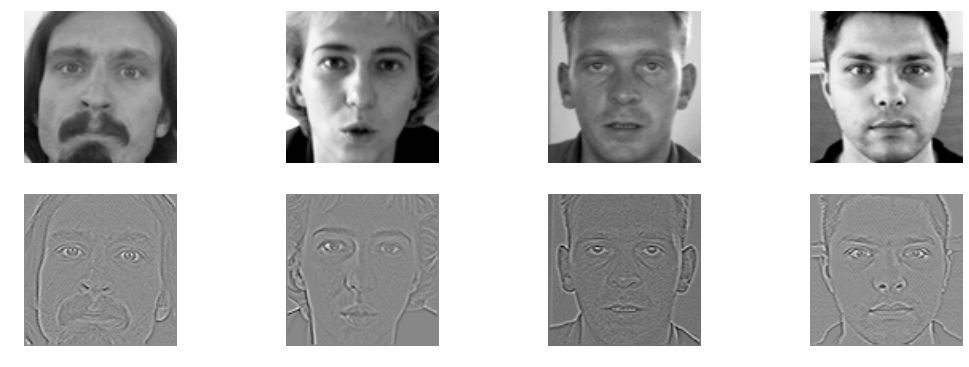

In [17]:
plot_transform(range(4), laplace)

## Gaussian Blur

In [24]:
from skimage.filters import gaussian

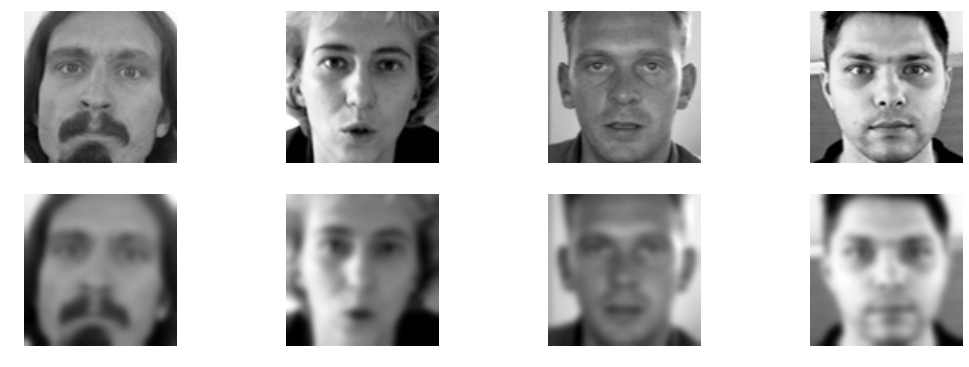

In [26]:
tr_gaussian = lambda x: gaussian(x, sigma=2, mode='mirror')
plot_transform(range(4), tr_gaussian)

## Combinations (Sobel + Gauss, Laplace + Gauss)

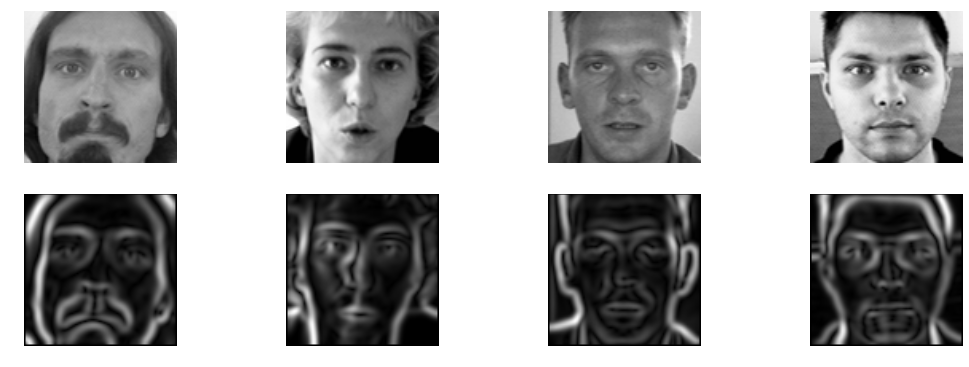

In [28]:
sob_gauss = lambda x: sobel(gaussian(x, sigma=2, mode='mirror'))
plot_transform(range(4), sob_gauss)

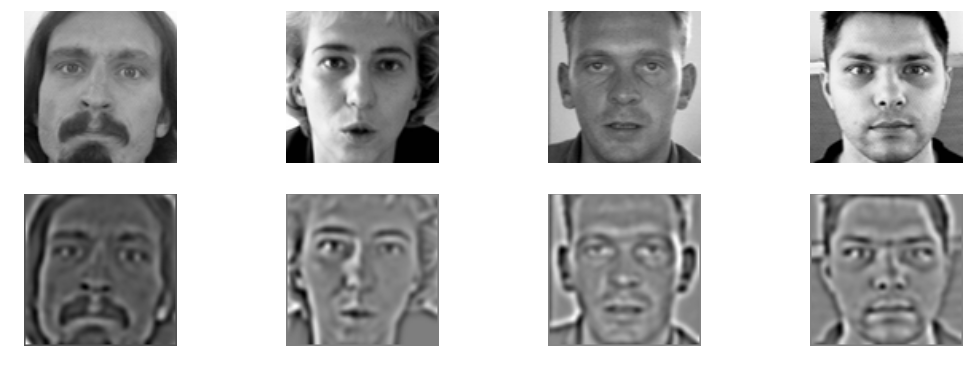

In [29]:
lap_gauss = lambda x: laplace(gaussian(x, sigma=2, mode='mirror'))
plot_transform(range(4), lap_gauss)

In [ ]:
## FACE DETECTION WITH lap_gauss ??

## Region Adjacency Graph (RAG)

In [30]:
from skimage import data, io, segmentation, color
from skimage.future import graph

In [41]:
def get_rag(img):
    labels = segmentation.slic(img, compactness=30, n_segments=500)
    return color.label2rgb(labels, img, kind='avg')

def norm_rag(img):
    labels1 = segmentation.slic(img, compactness=30, n_segments=500)
    out1 = color.label2rgb(labels1, img, kind='avg')

    g = graph.rag_mean_color(img, labels1, mode='similarity')
    labels2 = graph.cut_normalized(labels1, g)
    return color.label2rgb(labels2, img, kind='avg')

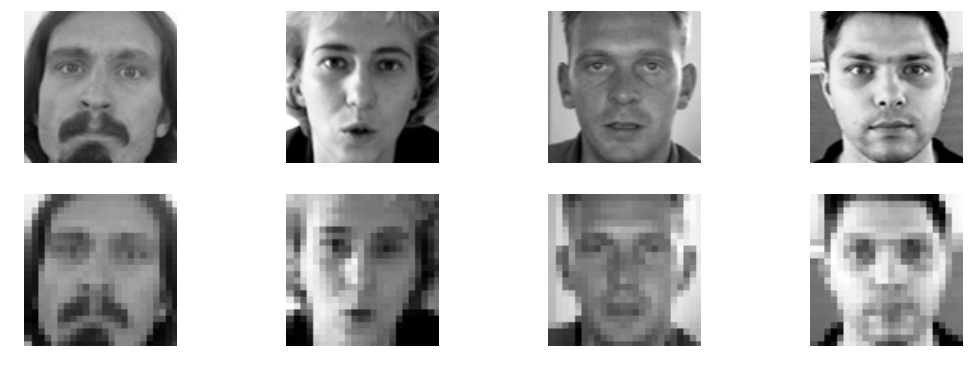

In [42]:
plot_transform(range(4), get_rag)

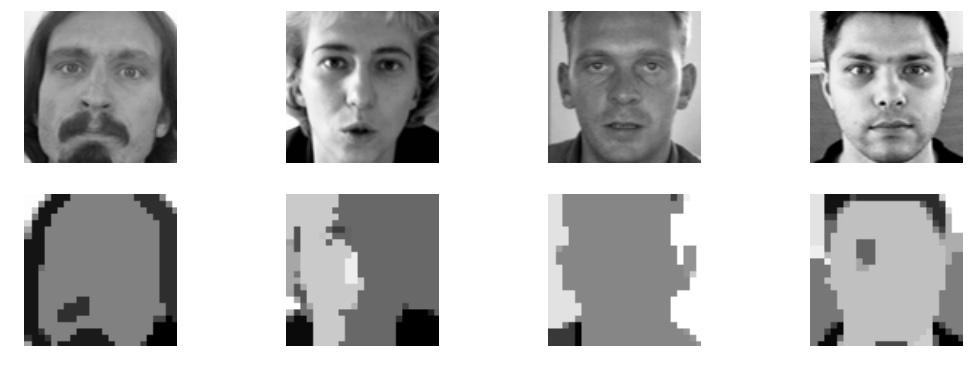

In [43]:
plot_transform(range(4), norm_rag)

## Watershed algorithm

In [51]:
from scipy import ndimage as ndi

from skimage.filters import rank
from skimage.morphology import watershed, disk

In [122]:
img = train_data[1153].reshape(96,96)

def get_watershed(img):
    ''' Performs Watershed algorithm '''
    markers = rank.gradient(img, disk(1)) < 17
    markers = ndi.label(markers)[0]

    # local gradient (disk(2) is used to keep edges thin)
    gradient = rank.gradient(img, disk(5))

    # process the watershed
    return watershed(gradient, markers)


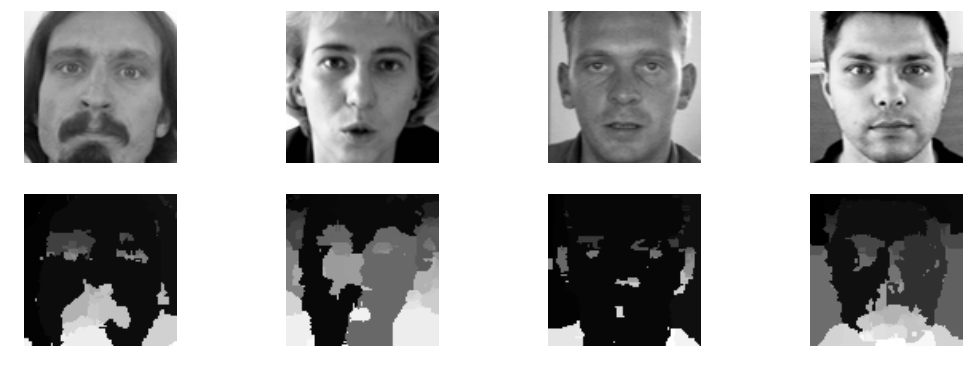

In [123]:
plot_transform(range(4), get_watershed)

## Histogram of Oriented Gradients (HOG)

In [124]:
from skimage import exposure
from skimage.feature import hog

In [139]:
def get_hog(img):
    ''' Perform Histogram of Oriented Gradients '''
    # Histogram of Oriented Gradients (HOG)
    _, _hog = hog(img, orientations=8, pixels_per_cell=(10, 10),
                    cells_per_block=(1, 1), visualise=True)
    return _hog


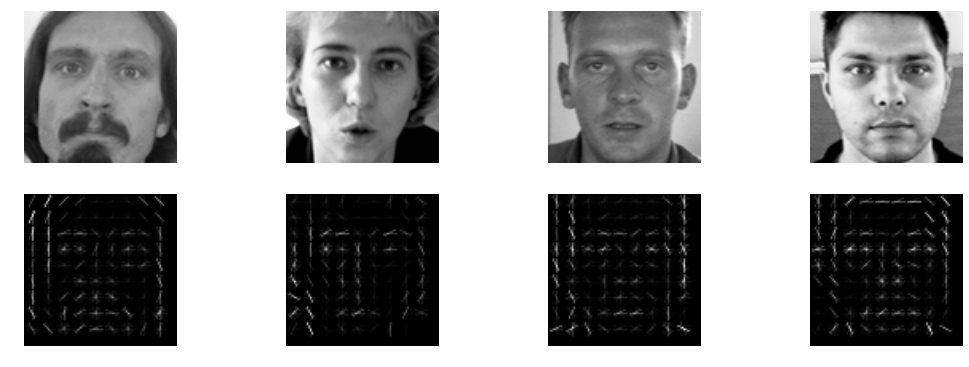

In [140]:
plot_transform(range(4), get_hog)

## Combination (Gauss + HOG)

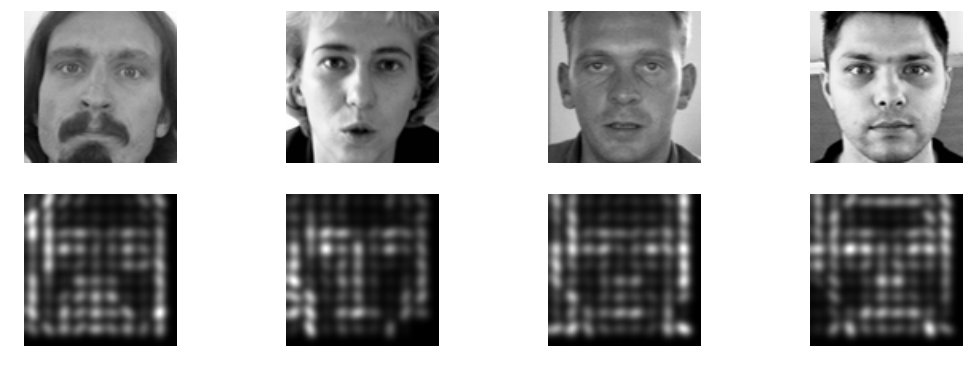

In [145]:
## HOG + GAUSSIAN
gauss_hog = lambda x: gaussian(get_hog(x), sigma=2.5, mode='mirror')
plot_transform(range(4), gauss_hog)